In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
     

In [6]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [8]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

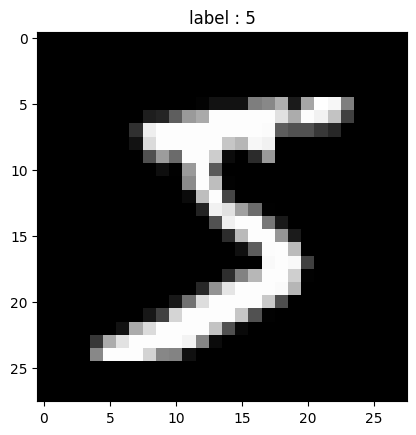

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

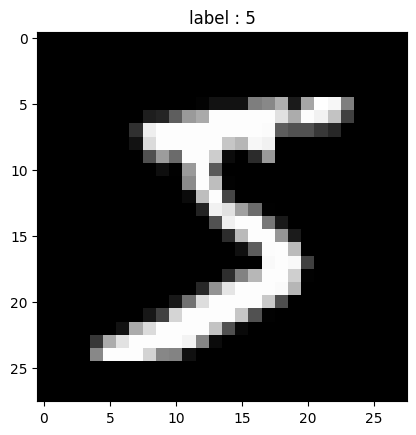

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [10]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float64) ## Convert to float type
image -= 105.35 ## Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) ## Check the value

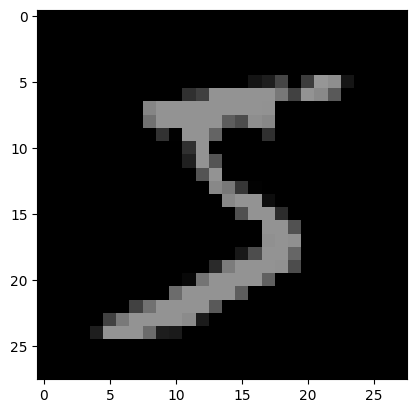

In [11]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

# Preprocessing


In [12]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


# Neural Network Scratch

### Problem 1-5

In [15]:
from sklearn.preprocessing import OneHotEncoder
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, n_nodes1, n_nodes2, lr=0.1, epoch=5, batch_size=20, sigma=0.01, activation_func="sigmoid", verbose = True):
        self.verbose = verbose
        self.params = {}
        self.bias = {}
        
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size
        self.sigma = sigma
        
        self.train_loss = []
        self.val_loss = []
        
        if activation_func == "sigmoid":
            self.forward_activation_func = self._sigmoid_forward
            self.backward_activation_func = self._sigmoid_backward
        elif activation_func == "tanh":
            self.forward_activation_func = self._tanh_forward
            self.backward_activation_func = self._tanh_backward
        else:
            raise ValueError("No exists such activation function !!")
                
    
    def fit(self, X, y, X_val=None, y_val=None):
        
       ## Whether to record the loss function of verification data
        calc_val = (X_val is not None) & (y_val is not None)
        
        ## One_hot conversion of objective variable
        y = self._one_hot_encoding(y) 
        if calc_val:
            y_val = self._one_hot_encoding(y_val) 
        
        ## Initial value parameter set
        self._set_parameters(X, y)
        
        ## Mini batch object definition
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        
        ## Learning
        for ep in range(self.epoch):
            for mini_X, mini_y in get_mini_batch:
                ## Forward propagation
                ## ① Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A1 = mini_X @ self.params["W1"] + self.bias["b1"]
                Z1 = self.forward_activation_func(A1)
                ## ② Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A2 = Z1 @ self.params["W2"] + self.bias["b2"]
                Z2 = self.forward_activation_func(A2)
                ## ③ Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A3 = Z2 @ self.params["W3"] + self.bias["b3"]
                Z3 = self._softmax(A3)
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                
               ## Backpropagation
                ## ③ Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA3 = Z3 - mini_y
                deltaB3 = np.sum(deltaA3, axis=0)
                deltaW3 = Z2.T @ deltaA3

                self.params["W3"] -= self.lr * deltaW3
                self.bias["b3"] -= self.lr * deltaB3
                
                deltaZ2 = deltaA3 @ self.params["W3"].T

                ## ② Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA2 = deltaZ2 * self.backward_activation_func(A2) 
                deltaB2 = np.sum(deltaA2, axis=0)
                deltaW2 = Z1.T @ deltaA2

                self.params["W2"] -= self.lr * deltaW2
                self.bias["b2"] -= self.lr * deltaB2
                
                deltaZ1 = deltaA2 @ self.params["W2"].T
                ## ① Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA1 = deltaZ1 * self.backward_activation_func(A1) 
                deltaB1 = np.sum(deltaA1, axis=0)
                deltaW1 = mini_X.T @ deltaA1

                self.params["W1"] -= self.lr * deltaW1
                self.bias["b1"] -= self.lr * deltaB1
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

            ## Record of loss
            tr_loss = self._cross_entropy(self.predict_prob(X), y)
            self.train_loss.append(tr_loss)
            
            if self.verbose:
                    print("Train loss of epoch {}: {}".format(ep, tr_loss))
            
            if calc_val:
                va_loss = self._cross_entropy(self.predict_prob(X_val), y_val)
                self.val_loss.append(va_loss)
                
                
    def predict_prob(self, X):
        ## Forward propagation
        ## ① Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A1 = X @ self.params["W1"] + self.bias["b1"]
        Z1 = self.forward_activation_func(A1)
        ## ② Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A2 = Z1 @ self.params["W2"] + self.bias["b2"]
        Z2 = self.forward_activation_func(A2)
        ## ③ Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A3 = Z2 @ self.params["W3"] + self.bias["b3"]
        y = self._softmax(A3)
        ##＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        
        return y
                
    def predict(self, X):
        y = np.argmax(self.predict_prob(X), axis=1)
         
        return y
    
    def _set_parameters(self, X, y):
        ## Set the number of features and the number of classes
        self.n_features = X.shape[1] 
        self.n_output = y.shape[1]
        
        ## Initial weight
        self.params["W1"] = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.params["W2"] = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.params["W3"] = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        
       ## Bias initial value
        self.bias["b1"] = self.sigma * np.random.randn(self.n_nodes1, )
        self.bias["b2"] = self.sigma * np.random.randn(self.n_nodes2, )
        self.bias["b3"] = self.sigma * np.random.randn(self.n_output, )
    
    def _sigmoid_forward(self, X):
        return 1 / (1 + np.exp(-X))
    
    def _tanh_forward(self, X):
        return np.tanh(X)
    
    def _sigmoid_backward(self, X):
        return (1-self._sigmoid_forward(X)) * self._sigmoid_forward(X)
    
    def _tanh_backward(self, X):
        return (1 - self._tanh_forward(X)**2)
    
    def _softmax(self, X):
        X = X - np.max(X)
        return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)
        
    def _one_hot_encoding(self, y):
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_one_hot = enc.fit_transform(y[:, np.newaxis])
        return y_one_hot

    def _cross_entropy(self, X, y):
        batch_size = len(X)
        delta = 1e-7
        return -np.sum(y * np.log(X+delta)) / batch_size

In [16]:
class GetMiniBatch:
    """
    Iterator to get a mini-batch

    Parameters
    ----------
    X :The following form ndarray, shape (n_samples, n_features)
      Training data
    y : The following form ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int64)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
      if self._counter >= self._stop:
          raise StopIteration()
      p0 = self._counter*self.batch_size
      p1 = self._counter*self.batch_size + self.batch_size
      self._counter += 1
      return self._X[p0:p1], self._y[p0:p1]
     

# Problem 6

In [17]:
nn = ScratchSimpleNeuralNetrowkClassifier(400,200, epoch=50,lr=1e-3)
nn.fit(X_train, y_train, X_test, y_test)

c:\users\user\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\user\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train loss of epoch 0: 2.320025361260178
Train loss of epoch 1: 2.3236168825733814
Train loss of epoch 2: 2.32605260541389
Train loss of epoch 3: 2.310923322527817
Train loss of epoch 4: 1.7362252380581482
Train loss of epoch 5: 1.1688109527947472
Train loss of epoch 6: 0.824648679662311
Train loss of epoch 7: 0.7316730220664884
Train loss of epoch 8: 0.6623402937595776
Train loss of epoch 9: 0.5920050410854365
Train loss of epoch 10: 0.5336433008945073
Train loss of epoch 11: 0.4892659859632193
Train loss of epoch 12: 0.4490569378052482
Train loss of epoch 13: 0.4108666974708852
Train loss of epoch 14: 0.38067862632068356
Train loss of epoch 15: 0.3585014065692742
Train loss of epoch 16: 0.3410111667412062
Train loss of epoch 17: 0.3263282880972958
Train loss of epoch 18: 0.3135452577443372
Train loss of epoch 19: 0.3021099676234983
Train loss of epoch 20: 0.29162705485476653
Train loss of epoch 21: 0.2818106811036449
Train loss of epoch 22: 0.2724659395532262
Train loss of epoch 23: 

In [18]:
y_pred = nn.predict(X_test)
print("pred:", y_pred)
print("ans:", y_test)
print("accuracy score:", accuracy_score(y_test, y_pred))

pred: [7 2 1 ... 4 5 6]
ans: [7 2 1 ... 4 5 6]
accuracy score: 0.9586


# Problem 7

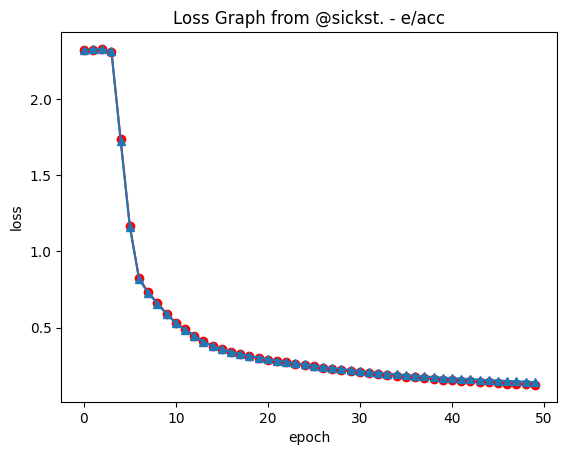

In [20]:
plt.plot(nn.train_loss, marker="o", label="train_loss", c= "red")
plt.plot(nn.val_loss, marker="^", label="val_loss")
plt.title("Loss Graph from @sickst. - e/acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [21]:
nn.train_loss

[2.320025361260178,
 2.3236168825733814,
 2.32605260541389,
 2.310923322527817,
 1.7362252380581482,
 1.1688109527947472,
 0.824648679662311,
 0.7316730220664884,
 0.6623402937595776,
 0.5920050410854365,
 0.5336433008945073,
 0.4892659859632193,
 0.4490569378052482,
 0.4108666974708852,
 0.38067862632068356,
 0.3585014065692742,
 0.3410111667412062,
 0.3263282880972958,
 0.3135452577443372,
 0.3021099676234983,
 0.29162705485476653,
 0.2818106811036449,
 0.2724659395532262,
 0.263471975732971,
 0.2547651156983258,
 0.2463229139307654,
 0.2381497057815785,
 0.23026410347269174,
 0.22268887816477542,
 0.21544362552798138,
 0.20854039756010007,
 0.20198207668801463,
 0.19576283618532875,
 0.1898698194369715,
 0.18428526140311605,
 0.17898853681878377,
 0.17395787765195955,
 0.16917167804634978,
 0.16460940158055995,
 0.16025214807392915,
 0.15608294687819854,
 0.15208683894108985,
 0.1482508039779506,
 0.14456358571523337,
 0.14101546439528256,
 0.13759801789852585,
 0.13430390048146695,

In [22]:
nn.val_loss

[2.32122528345137,
 2.325171845130146,
 2.3278806411633646,
 2.312511017807955,
 1.7239535726647321,
 1.1599582761183682,
 0.8185323285030868,
 0.7272855683139527,
 0.658646064225999,
 0.5879619839696665,
 0.5295213841326688,
 0.48581217107131625,
 0.44666759995823757,
 0.4094848227605167,
 0.3801802156761684,
 0.35887380639845984,
 0.342165609235934,
 0.3280866700642965,
 0.3157377505038849,
 0.3046385652188311,
 0.2944712538672369,
 0.2850011958934699,
 0.2760546671171034,
 0.26751108477420915,
 0.25929645736736,
 0.25137466616396625,
 0.24373700148928729,
 0.23639151690740828,
 0.22935364278681314,
 0.22263896772916725,
 0.21625857421600053,
 0.21021684339788643,
 0.20451121868544406,
 0.1991331638324754,
 0.19406958271706515,
 0.1893042177780851,
 0.18481882427769092,
 0.18059409893001457,
 0.1766104130216165,
 0.1728484052092312,
 0.16928946634829706,
 0.1659161228571377,
 0.1627123114050007,
 0.15966353972518738,
 0.1567569396766504,
 0.15398123024354135,
 0.1513266144617783,
 0.

# Problem 8

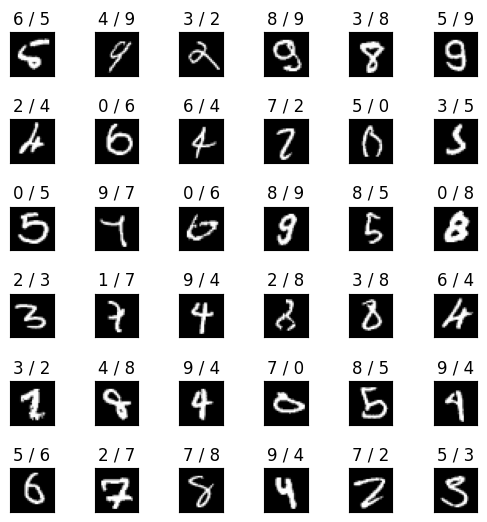

In [23]:
y_val = y_test

"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".

Parameters:
----------
y_pred : Estimated value ndarray (n_samples,)
y_val : Correct label for validation data (n_samples,)
X_val : Features of verification data（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # How many to display
true_false = y_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int64)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')